# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox 

## Reddit Networks
Using the [Reddit networks dataset](http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite  TV show. Using the data of the selected subreddit, 
answer the following questions:

In [4]:
!mkdir ./datasets/

In [ ]:
!pip install turicreate

     |████████████████████████████████| 92.0MB 47kB/s 
     |████████████████████████████████| 3.5MB 42.6MB/s 
     |████████████████████████████████| 3.6MB 34.4MB/s 
     |████████████████████████████████| 86.4MB 50kB/s 
     |████████████████████████████████| 327kB 53.6MB/s 
     |████████████████████████████████| 18.3MB 256kB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 450kB 28.7MB/s 
     |████████████████████████████████| 3.8MB 42.5MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp37-none-any.whl size=320845 sha256=04c5b80f2c70839389ff0c819df44fc18981853559af1da95e8fe5a1895f58cf
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for prettytable: filename=prettytable-0.7.2-cp37-none-any.whl size=13700 sha256=2b74012b522b2c3ec973222fad2972a59f1af0921b6acd8637c19f865ef07c10
  Stored in directory: /root/.cache/pip/wheels/80/34/1c/3967380d9676d162cb5951

In [ ]:
!mkdir ./datasets/AnalyzingBigData_Ass4/
!wget http://dynamics.cs.washington.edu/nobackup/reddit/breakingbad.tar.gz -O ./datasets/AnalyzingBigData_Ass4/breakingbad.tar.gz

--2021-04-15 10:25:53--  http://dynamics.cs.washington.edu/nobackup/reddit/breakingbad.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 459227024 (438M) [application/x-gzip]
Saving to: ‘./datasets/AnalyzingBigData_Ass4/breakingbad.tar.gz’

./datasets/Analyzin 100%[===================>] 437.95M  39.4MB/s    in 11s     

2021-04-15 10:26:05 (39.0 MB/s) - ‘./datasets/AnalyzingBigData_Ass4/breakingbad.tar.gz’ saved [459227024/459227024]



In [ ]:
!tar -xf ./datasets/AnalyzingBigData_Ass4/breakingbad.tar.gz -C ./datasets/AnalyzingBigData_Ass4/
!ls ./datasets/AnalyzingBigData_Ass4/

breakingbad.2010-03-22.2010-04-19.sgraph
breakingbad.2010-03-22.2010-05-17.sgraph
breakingbad.2010-03-22.2010-06-14.sgraph
breakingbad.2010-03-22.2010-07-12.sgraph
breakingbad.2010-03-22.2010-08-09.sgraph
breakingbad.2010-03-22.2010-09-06.sgraph
breakingbad.2010-03-22.2010-10-04.sgraph
breakingbad.2010-03-22.2010-11-01.sgraph
breakingbad.2010-03-22.2010-11-29.sgraph
breakingbad.2010-03-22.2010-12-27.sgraph
breakingbad.2010-03-22.2011-01-24.sgraph
breakingbad.2010-03-22.2011-02-21.sgraph
breakingbad.2010-03-22.2011-03-21.sgraph
breakingbad.2010-03-22.2011-04-18.sgraph
breakingbad.2010-03-22.2011-05-16.sgraph
breakingbad.2010-03-22.2011-06-13.sgraph
breakingbad.2010-03-22.2011-07-11.sgraph
breakingbad.2010-03-22.2011-08-08.sgraph
breakingbad.2010-03-22.2011-09-05.sgraph
breakingbad.2010-03-22.2011-10-03.sgraph
breakingbad.2010-03-22.2011-10-31.sgraph
breakingbad.2010-03-22.2011-11-28.sgraph
breakingbad.2010-03-22.2011-12-26.sgraph
breakingbad.2010-03-22.2012-01-23.sgraph
breakingbad.2010

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import turicreate as tc 

sg = tc.load_sgraph('./datasets/AnalyzingBigData_Ass4/breakingbad.2010-03-22.2016-10-31.sgraph')

In [ ]:
g = nx.Graph()
g.add_nodes_from(v['__id'] for v in sg.vertices)
g.add_edges_from([(e['__src_id'],e['__dst_id']) for e in sg.edges])
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 158135
Number of edges: 490113
Average degree:   6.1987


**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

In [ ]:
d = g.degree()
list(dict(d).items())[:20]

[('StuntGranny', 3),
 ('Gryphon0468', 1),
 ('IMPERIALxMASTER', 1),
 ('Joleo', 0),
 ('Deets1901', 2),
 ('kushdup', 0),
 ('stnmurphy43', 0),
 ('mandipoo', 0),
 ('HoustonFrog', 1),
 ('adhikapp', 2),
 ('Geicosellscrap', 1),
 ('ndrake127', 1),
 ('jimbob57566', 1),
 ('andourfootballteam', 2),
 ('caeasw', 0),
 ('ivyplant', 2),
 ('grinningdeamon', 2),
 ('aminvirginia', 0),
 ('a11235813', 1),
 ('tub56857', 1)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


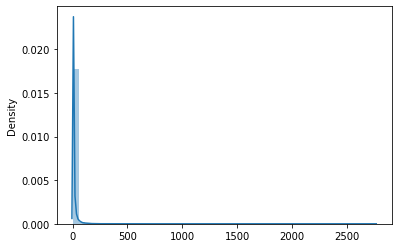

In [ ]:
import seaborn as sns
%matplotlib inline
sns.distplot([v for v in dict(d).values()])

In [ ]:
selected_nodes_list = [n for n,d in dict(d).items() if d > 0]
# create a subgraph with only nodes from the above list
sub_g = g.subgraph(selected_nodes_list)
sub_d = sub_g.degree()
print(nx.info(sub_g))

Name: 
Type: Graph
Number of nodes: 121179
Number of edges: 490113
Average degree:   8.0891


**Task 2:** Create a subgraph of the top-40 users according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

In [ ]:
top_degree = sorted(dict(sub_d).items(), key=lambda x:-x[1])

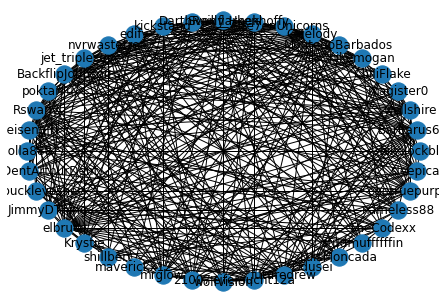

In [ ]:
# let's create a list with nodes that have degree > 1
selected_nodes_list = [n for n,d in top_degree[:40]]
# create a subgraph with only nodes from the above list
h = sub_g.subgraph(selected_nodes_list)
nx.draw_circular(h, with_labels=True)

**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

In [ ]:
pr = nx.pagerank(h)
pr

{'12buckleyoshoe': 0.017004003946523582,
 '21007': 0.022181860697127027,
 'BackflipJohnson': 0.030594962986925316,
 'Barbarus623': 0.02485525737111873,
 'CMelody': 0.04533263657246506,
 'ChiliFlake': 0.016592788430223777,
 'DaLateDentArthurDent': 0.020198633196269817,
 'DarthReilly': 0.02775593748089663,
 'JimmyDThing': 0.023600947649924434,
 'Krystie': 0.01985402579725779,
 'LuisMoncada': 0.01870453353936153,
 'MontegoBarbados': 0.023877808985501632,
 'Odusei': 0.022642463374023317,
 'Rswany': 0.035656184986780595,
 'Se7enUnicorns': 0.023805258945653263,
 'Sven__Hoek': 0.044188918562663874,
 'TheCodexx': 0.020079963276465638,
 'bikelockbling': 0.01712544144297812,
 'edify': 0.026052605928455097,
 'eifersucht12a': 0.03204345979189848,
 'elbruce': 0.03964444139457662,
 'flarkenhoffy': 0.023620124854145753,
 'futuredrew': 0.02498552027070041,
 'heisengirl': 0.030816170076844864,
 'hikemogan': 0.026086862432016442,
 'jet_tripleseven': 0.03314627737541175,
 'jjolla888': 0.01681861657354885

In [ ]:
avg_sp_dic = {}
for source in h.nodes:
  sp, counter = 0, 0
  for target in h.nodes:
    if source==target:
      continue
    if nx.has_path(h, source, target):
      counter+=1
      sp += nx.shortest_path_length(h, source, target)
  avg_sp_dic[source] = sp/counter
avg_sp_dic

{'12buckleyoshoe': 1.7435897435897436,
 '21007': 1.6153846153846154,
 'BackflipJohnson': 1.435897435897436,
 'Barbarus623': 1.5384615384615385,
 'CMelody': 1.1025641025641026,
 'ChiliFlake': 1.7179487179487178,
 'DaLateDentArthurDent': 1.641025641025641,
 'DarthReilly': 1.5128205128205128,
 'JimmyDThing': 1.564102564102564,
 'Krystie': 1.641025641025641,
 'LuisMoncada': 1.6923076923076923,
 'MontegoBarbados': 1.564102564102564,
 'Odusei': 1.5897435897435896,
 'Rswany': 1.3076923076923077,
 'Se7enUnicorns': 1.564102564102564,
 'Sven__Hoek': 1.1282051282051282,
 'TheCodexx': 1.641025641025641,
 'bikelockbling': 1.7435897435897436,
 'edify': 1.5384615384615385,
 'eifersucht12a': 1.4102564102564104,
 'elbruce': 1.2564102564102564,
 'flarkenhoffy': 1.564102564102564,
 'futuredrew': 1.5384615384615385,
 'heisengirl': 1.435897435897436,
 'hikemogan': 1.5384615384615385,
 'jet_tripleseven': 1.3846153846153846,
 'jjolla888': 1.7435897435897436,
 'kickstand': 1.5128205128205128,
 'magister0': 1.

In [ ]:
t = nx.triangles(g)
t

{'StuntGranny': 0,
 'Gryphon0468': 0,
 'IMPERIALxMASTER': 0,
 'Joleo': 0,
 'Deets1901': 0,
 'kushdup': 0,
 'stnmurphy43': 0,
 'mandipoo': 0,
 'HoustonFrog': 0,
 'adhikapp': 0,
 'Geicosellscrap': 0,
 'ndrake127': 0,
 'jimbob57566': 0,
 'andourfootballteam': 0,
 'caeasw': 0,
 'ivyplant': 0,
 'grinningdeamon': 0,
 'aminvirginia': 0,
 'a11235813': 0,
 'tub56857': 0,
 'Bhaksala': 1,
 'Coast2CoastAssBlast': 0,
 'theycallmemisty': 0,
 'PanicMoon13': 0,
 'imjustbait': 0,
 'sloppyjoes7': 0,
 'Brad-Bear': 0,
 'scroopy_nooperz': 1,
 'justrobo': 0,
 'wheredyagoforest': 0,
 'LazyNotTalented': 0,
 'princessvaginaalpha': 0,
 'Cheesehead302': 0,
 'CarboniteFrozen': 0,
 'ImaginaryEngineering': 0,
 'jasnea12': 0,
 'redshadow_18': 0,
 'g0atmeal': 0,
 'Fortehlulz33': 0,
 'CelalT': 1,
 'JohnGalt1776': 0,
 'attorniquetnyc': 0,
 'OBSTACLE3': 0,
 'gchames': 0,
 'toinfinityandbeyon': 0,
 'betoelectrico': 0,
 'rekt_lolz': 14,
 'DudeDude2020': 0,
 'MKoilers': 0,
 'Chrisalexandra': 0,
 'lfoqwhd': 5,
 'crabbix': 0

**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [ ]:
import networkx as nx

In [ ]:
nx.write_gml(h,"Reddit.gml")

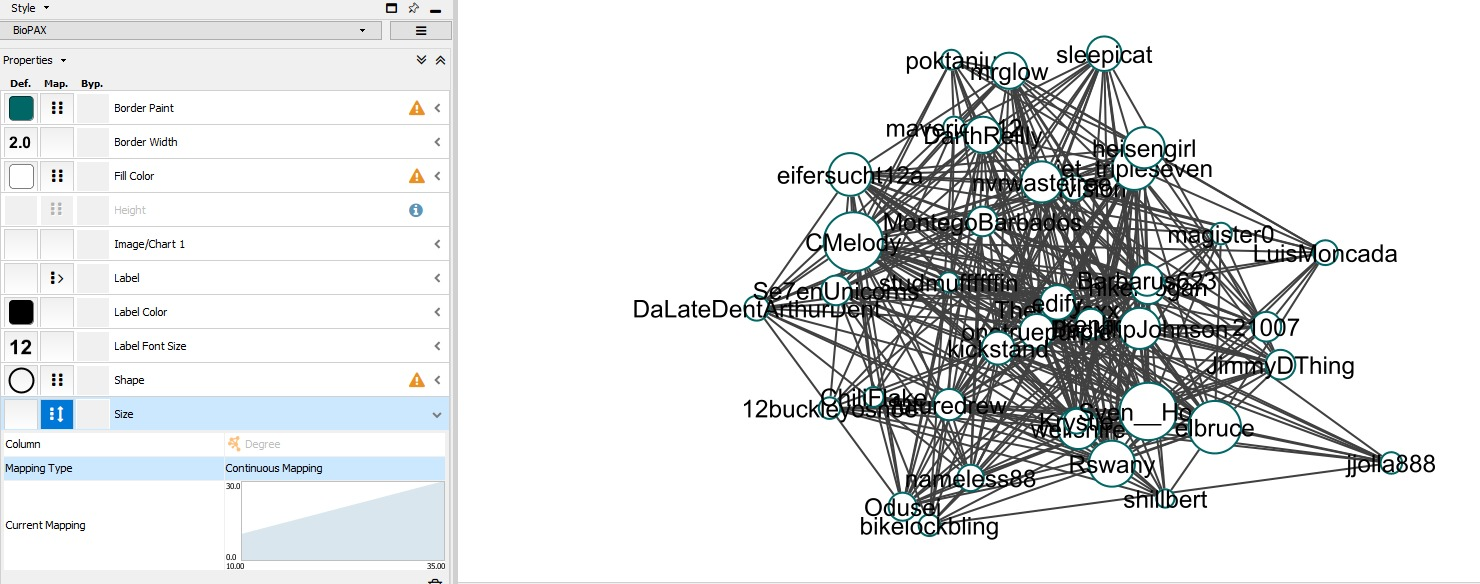

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

In [ ]:
def vertex_subgraph(vertex):
  selected_nodes_list = [n for n in sub_g.neighbors(vertex)] + [vertex]
  return sub_g.subgraph(selected_nodes_list)

In [ ]:
dict(sub_d)[selected_nodes_list[0]]

2762

In [ ]:
vertex_g = vertex_subgraph(selected_nodes_list[39])
print(nx.info(vertex_g))

Name: 
Type: Graph
Number of nodes: 459
Number of edges: 1775
Average degree:   7.7342


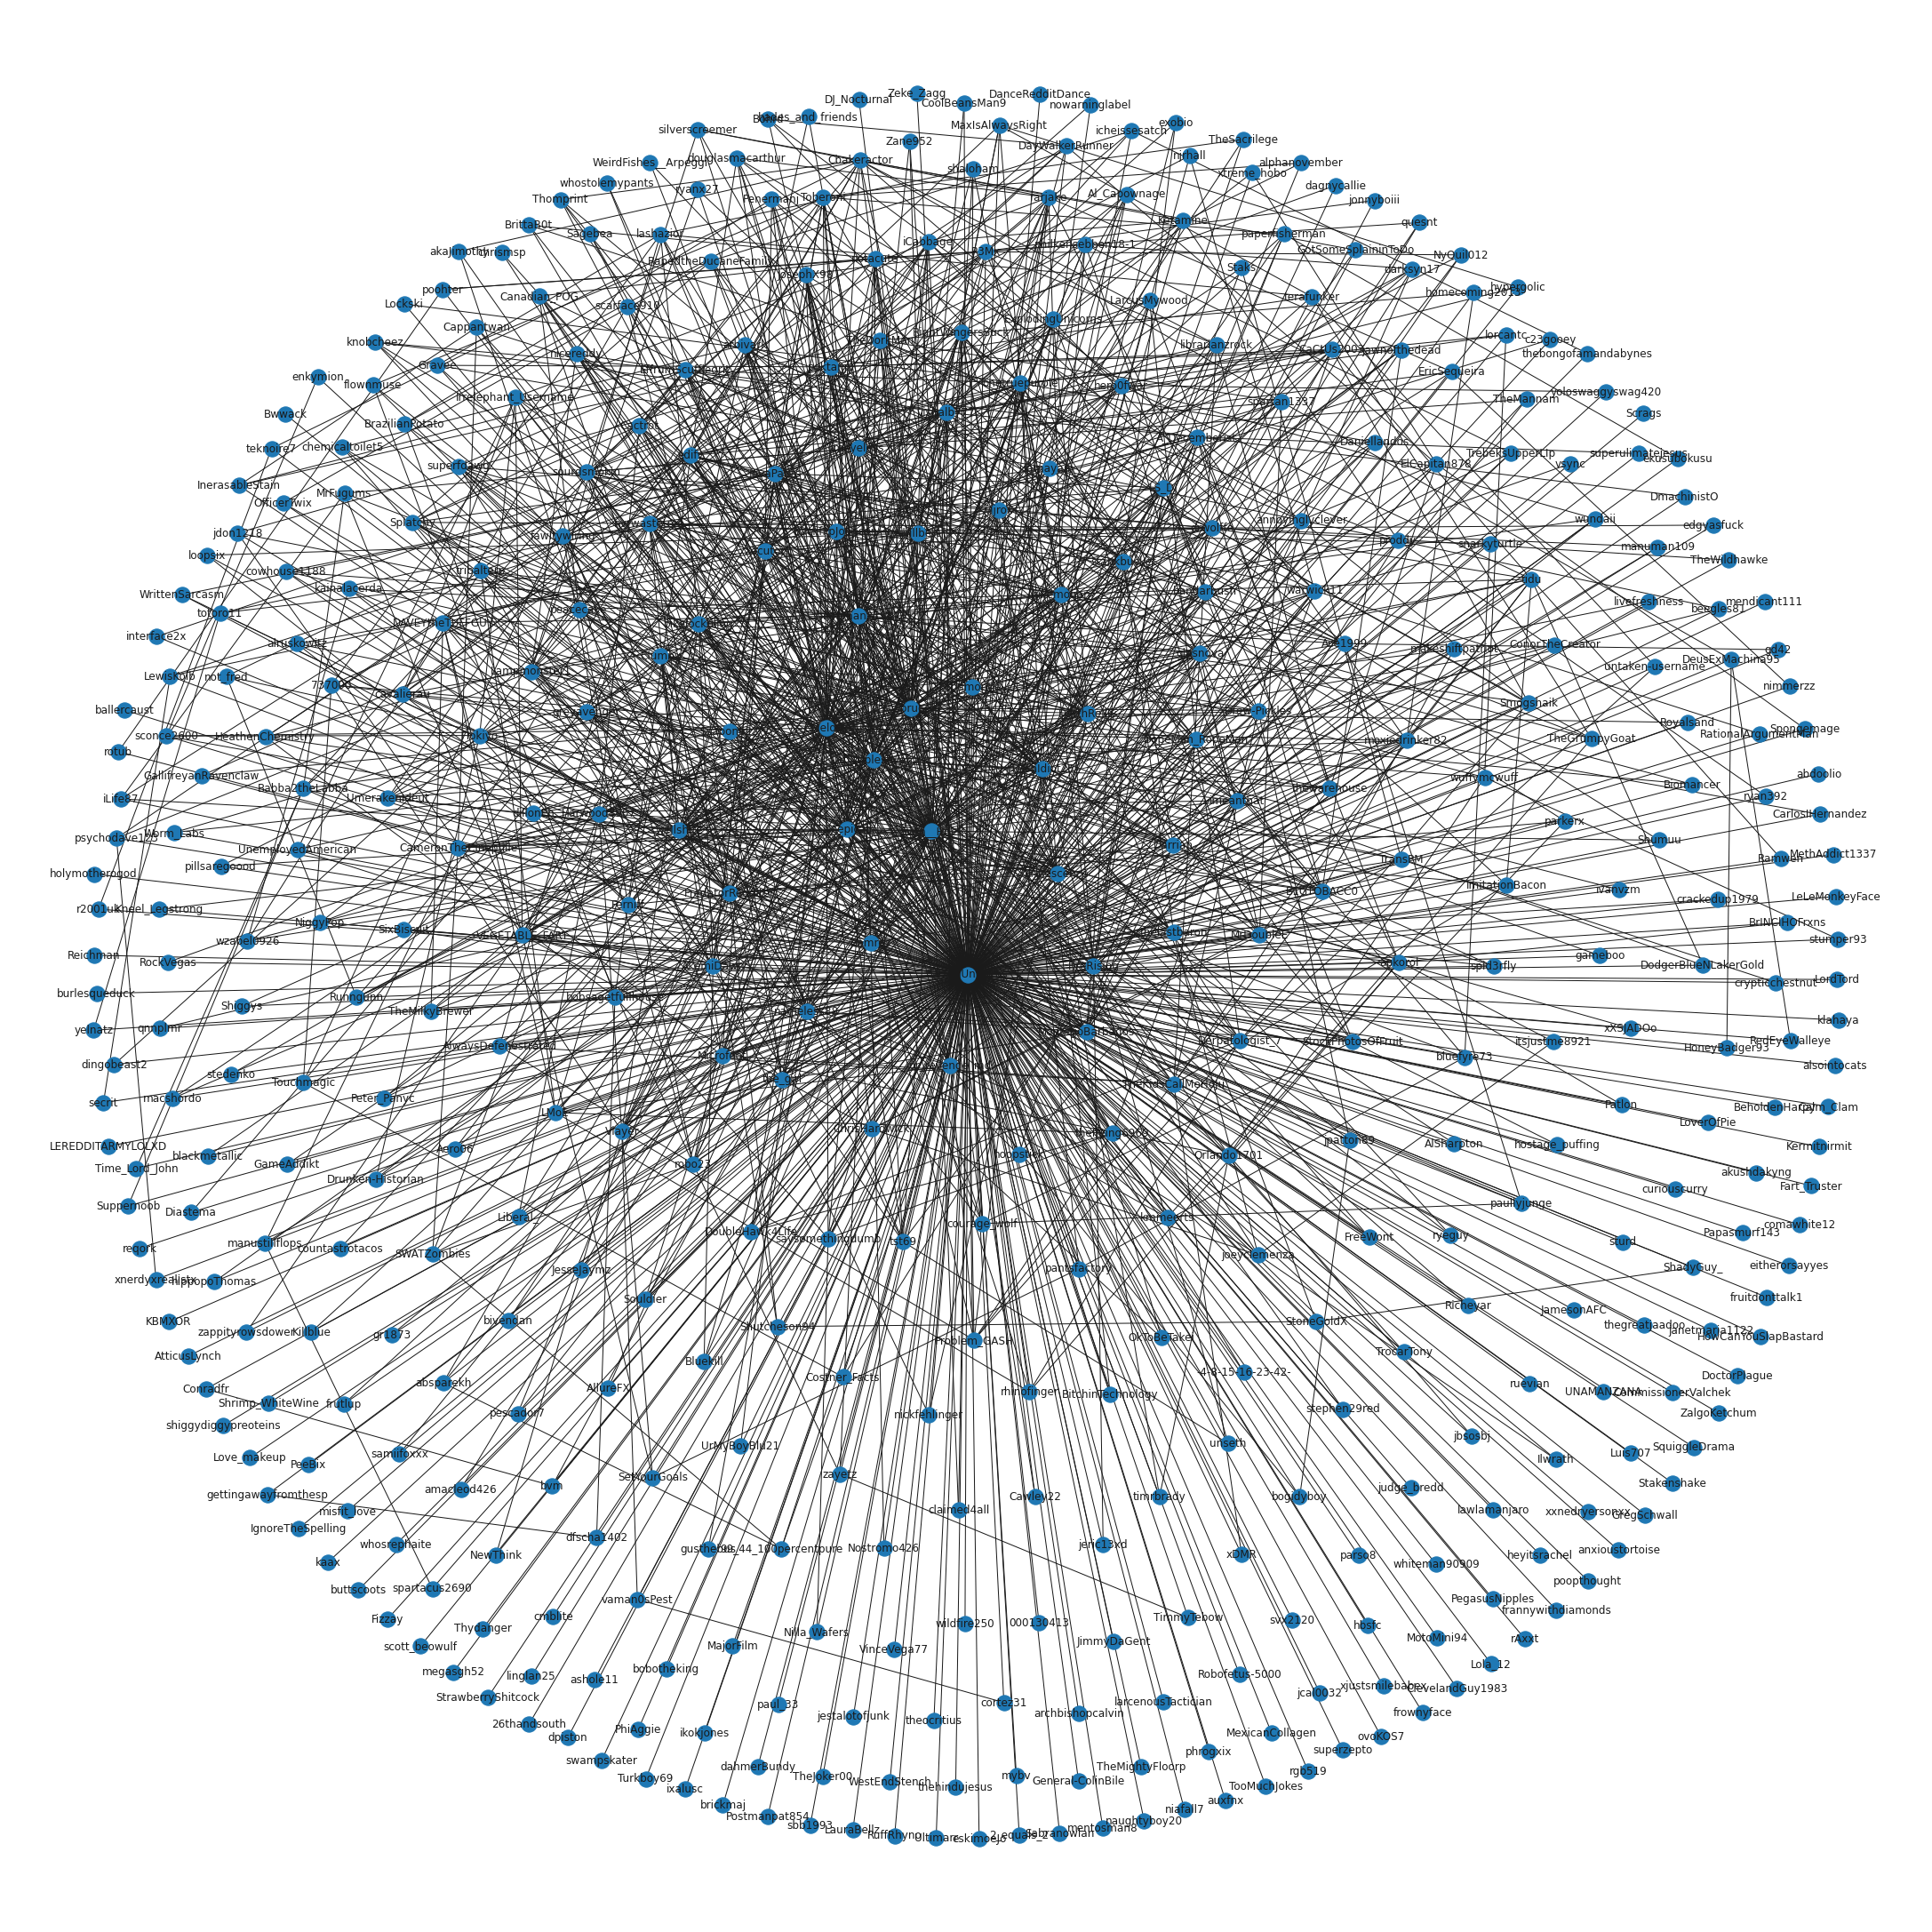

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
nx.draw_kamada_kawai(vertex_g, with_labels=True)

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges

In [ ]:
!mkdir ./datasets/AnalyzingBigData_Ass4_6/
!wget http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz -O ./datasets/AnalyzingBigData_Ass4_6/chess.tar.gz

--2021-04-15 07:56:15--  http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz
Resolving dynamics.cs.washington.edu (dynamics.cs.washington.edu)... 128.208.3.120, 2607:4000:200:12::78
Connecting to dynamics.cs.washington.edu (dynamics.cs.washington.edu)|128.208.3.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6852261483 (6.4G) [application/x-gzip]
Saving to: ‘./datasets/AnalyzingBigData_Ass4_6/chess.tar.gz’

./datasets/Analyzin 100%[===================>]   6.38G  13.1MB/s    in 6m 4s   

2021-04-15 08:02:19 (18.0 MB/s) - ‘./datasets/AnalyzingBigData_Ass4_6/chess.tar.gz’ saved [6852261483/6852261483]



In [ ]:
!tar -xf ./datasets/AnalyzingBigData_Ass4_6/chess.tar.gz -C ./datasets/AnalyzingBigData_Ass4_6/
!ls ./datasets/AnalyzingBigData_Ass4_6/

chess.tar.gz  FCIS


In [ ]:
import networkx as nx
import turicreate as tc 
n_sf = tc.SFrame.read_csv("./datasets/AnalyzingBigData_Ass4_6/FCIS/fcis_chess.vertices.csv")
e_sf = tc.SFrame.read_csv("./datasets/AnalyzingBigData_Ass4_6/FCIS/fcis_chess.interactions.csv")

Finished parsing file /content/datasets/AnalyzingBigData_Ass4_6/FCIS/fcis_chess.vertices.csv

Parsing completed. Parsed 100 lines in 1.64789 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/datasets/AnalyzingBigData_Ass4_6/FCIS/fcis_chess.vertices.csv

Parsing completed. Parsed 519583 lines in 0.706538 secs.

Finished parsing file /content/datasets/AnalyzingBigData_Ass4_6/FCIS/fcis_chess.interactions.csv

Parsing completed. Parsed 100 lines in 4.45289 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 1548668 lines. Lines per second: 436981

Read 6175079 lines. Lines per second: 646184

Read 10796228 lines. Lines per second: 694120

Read 15412632 lines. Lines per second: 712203

Read 20010030 lines. Lines per second: 719630

Read 24586279 lines. Lines per second: 722057

Read 29153431 lines. Lines per second: 719640

Read 33722575 lines. Lines per second: 715450

Read 38270264 lines. Lines per second: 710490

Read 42794143 lines. Lines per second: 705798

Read 47304191 lines. Lines per second: 702138

Read 51821131 lines. Lines per second: 697844

Read 56329738 lines. Lines per second: 693686

Read 60828651 lines. Lines per second: 690738

Read 65316215 lines. Lines per second: 687412

Read 69804396 lines. Lines per second: 684182

Read 74275409 lines. Lines per second: 681231

Read 78745324 lines. Lines per second: 678377

Read 83203230 lines. Lines per second: 675195

Read 87660144 lines. Lines per second: 672221

Read 92112216 lines. Lines per second: 669493

Read 96555817 lines. Lines per second: 666725

Read 100991775 lines. Lines per second: 664187

Read 105413426 lines. Lines per second: 661538

Read 108355850 lines. Lines per second: 657881

Read 111306513 lines. Lines per second: 656155

Read 115730070 lines. Lines per second: 653664

Read 118671122 lines. Lines per second: 651986

Read 123081208 lines. Lines per second: 649428

Read 126014228 lines. Lines per second: 647665

Read 128946848 lines. Lines per second: 645890

Read 131879793 lines. Lines per second: 644357

Read 134812944 lines. Lines per second: 642767

Read 137748446 lines. Lines per second: 641145

Read 140680476 lines. Lines per second: 639522

Read 143607021 lines. Lines per second: 630287

Read 146529119 lines. Lines per second: 624342

Read 149449644 lines. Lines per second: 622781

Read 152363852 lines. Lines per second: 621361

Read 155276052 lines. Lines per second: 619981

Read 158191611 lines. Lines per second: 618573

Read 161097120 lines. Lines per second: 617192

Read 164005010 lines. Lines per second: 615838

Read 166915563 lines. Lines per second: 614488

Read 169818680 lines. Lines per second: 613243

Read 172716695 lines. Lines per second: 611953

Read 175612879 lines. Lines per second: 610595

Read 178510156 lines. Lines per second: 609355

Read 181401057 lines. Lines per second: 608045

Read 184302280 lines. Lines per second: 606735

Read 187202364 lines. Lines per second: 605531

Read 190096157 lines. Lines per second: 604325

Read 192988919 lines. Lines per second: 603128

Read 195876555 lines. Lines per second: 601840

Read 198761893 lines. Lines per second: 600688

Read 201644189 lines. Lines per second: 599528

Read 204532703 lines. Lines per second: 598374

Read 207426728 lines. Lines per second: 594610

Read 210317873 lines. Lines per second: 593496

Read 213205586 lines. Lines per second: 592266

Read 216088832 lines. Lines per second: 590952

Read 218969872 lines. Lines per second: 589659

Read 221855079 lines. Lines per second: 588430

Read 224739529 lines. Lines per second: 587252

Read 227622610 lines. Lines per second: 586107

Read 230505876 lines. Lines per second: 584986

Read 233381854 lines. Lines per second: 583864

Read 236257857 lines. Lines per second: 582768

Read 239130800 lines. Lines per second: 581630

Read 242006202 lines. Lines per second: 580514

Read 244882435 lines. Lines per second: 579410

Read 247759584 lines. Lines per second: 578116

Read 250641606 lines. Lines per second: 576977

Read 253519816 lines. Lines per second: 575861

Read 256400165 lines. Lines per second: 574741

Read 259275137 lines. Lines per second: 573615

Read 262150668 lines. Lines per second: 572502

Read 265024016 lines. Lines per second: 571367

Read 267895277 lines. Lines per second: 570243

Read 270766840 lines. Lines per second: 569176

Read 273636591 lines. Lines per second: 568131

Read 276506992 lines. Lines per second: 567123

Read 279379571 lines. Lines per second: 566104

Read 282252492 lines. Lines per second: 565099

Read 285127555 lines. Lines per second: 564114

Read 288002448 lines. Lines per second: 563101

Read 290876462 lines. Lines per second: 562055

Read 293750113 lines. Lines per second: 561006

Read 296624636 lines. Lines per second: 560016

Read 299500440 lines. Lines per second: 559031

Read 302375786 lines. Lines per second: 558022

Read 305249992 lines. Lines per second: 557009

Read 308123253 lines. Lines per second: 556016

Read 310995243 lines. Lines per second: 555058

Read 313860080 lines. Lines per second: 522807

Read 315290807 lines. Lines per second: 520851

Read 318150509 lines. Lines per second: 520238

Read 321015967 lines. Lines per second: 519627

Read 323883036 lines. Lines per second: 519080

Read 326753514 lines. Lines per second: 518580

Read 329624994 lines. Lines per second: 518050

Read 332496842 lines. Lines per second: 517507

Read 335365218 lines. Lines per second: 516910

Read 338229988 lines. Lines per second: 516316

Read 341097802 lines. Lines per second: 515723

Read 343966321 lines. Lines per second: 515102

Read 346838833 lines. Lines per second: 514522

Read 349714438 lines. Lines per second: 513958

Read 352588025 lines. Lines per second: 513339

Read 355456975 lines. Lines per second: 512781

Read 358335355 lines. Lines per second: 512198

Read 361211936 lines. Lines per second: 511702

Read 364089809 lines. Lines per second: 511151

Read 366974454 lines. Lines per second: 510645

Read 369856049 lines. Lines per second: 510145

Read 372735190 lines. Lines per second: 509584

Read 375616558 lines. Lines per second: 509038

Read 378499056 lines. Lines per second: 508525

Read 381380543 lines. Lines per second: 508036

Read 384256319 lines. Lines per second: 507481

Read 387131658 lines. Lines per second: 506955

Read 390003584 lines. Lines per second: 506438

Read 392876537 lines. Lines per second: 505899

Read 395744809 lines. Lines per second: 505404

Read 398612733 lines. Lines per second: 504878

Read 401487829 lines. Lines per second: 504365

Read 404360830 lines. Lines per second: 503893

Read 407235596 lines. Lines per second: 503394

Read 410106260 lines. Lines per second: 502867

Read 412981163 lines. Lines per second: 502396

Read 415857205 lines. Lines per second: 501883

Read 418727013 lines. Lines per second: 501432

Read 420160856 lines. Lines per second: 498925

Read 421593326 lines. Lines per second: 497550

Read 424460429 lines. Lines per second: 496998

Read 427336751 lines. Lines per second: 496540

Finished parsing file /content/datasets/AnalyzingBigData_Ass4_6/FCIS/fcis_chess.interactions.csv

Parsing completed. Parsed 429747476 lines in 864.024 secs.

In [ ]:
sg = tc.SGraph(vertices=n_sf, edges=e_sf, vid_field='v_id', src_field="src_id", dst_field="dst_id")
sg.summary()

{'num_edges': 429747476, 'num_vertices': 519583}

In [ ]:
#find centrality According to PageRank :
pr = tc.pagerank.create(sg)
sg.vertices['pagerank'] = pr['graph'].vertices['pagerank'] #pr['graph'] is a graph in which each vertex has pagerank value
sg_v_sorted = sg.vertices.sort('pagerank', ascending = False)
sg_v_sorted[:10]

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 632166                |

| 2         | 180728                |

| 3         | 68816.1               |

| 4         | 37065.1               |

| 5         | 22362.9               |

| 6         | 14085.1               |

| 7         | 9275.28               |

| 8         | 6324.12               |

| 9         | 4374.45               |

| 10        | 3129.99               |

| 11        | 2241.2                |

| 12        | 1641.8                |

| 13        | 1201.78               |

| 14        | 891.069               |

| 15        | 660.813               |

| 16        | 493.889               |

| 17        | 369.505               |

| 18        | 277.958               |

| 19        | 209.503               |

| 20        | 158.656               |

+-----------+-----------------------+

Columns:
	__id	str
	mindate	str
	maxdate	str
	pagerank	float

Rows: 10

Data:
+-------------+-----------------+-----------------+--------------------+
|     __id    |     mindate     |     maxdate     |      pagerank      |
+-------------+-----------------+-----------------+--------------------+
|   inemuri   | 20070609T153400 | 20160101T025100 | 1613.8107651564962 |
|     mscp    | 19990807T034200 | 20160101T025600 | 1564.7589296540255 |
|   GriffySr  | 20010124T195700 | 20160101T025200 | 962.7591784064691  |
|   GriffyJr  | 20010801T211200 | 20160101T025500 | 913.0835274358144  |
|   IFDThor   | 20011215T140700 | 20160101T025300 |  890.82941667539   |
| callipygian | 20011009T193600 | 20160101T025900 | 669.0030241684906  |
|    parrot   | 19990131T000000 | 20150706T135500 | 631.5064943598901  |
|   MiloBot   | 20100906T223600 | 20131016T214900 | 598.3467310574645  |
| BabyLurking | 20071207T205300 | 20160101T024800 | 482.10238934956243 |
|   LuigiBot  | 20020126T100600 | 20131016T214800 | 458.3049984086376  |
+-------------+-----------------+-----------------+--------------------+
[10 rows x 4 columns]

In [ ]:
chosen = sg_v_sorted[20000]
chosen['__id']

'FornodiZoldo'

In [ ]:
sg_chosen = sg.get_neighborhood(ids=[chosen['__id']], radius=1,full_subgraph=True)

In [ ]:
g = nx.Graph()
g.add_nodes_from(v['__id'] for v in sg_chosen.vertices)
g.add_edges_from([(e['__src_id'],e['__dst_id']) for e in sg_chosen.edges])
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 2152
Number of edges: 309634
Average degree: 287.7639


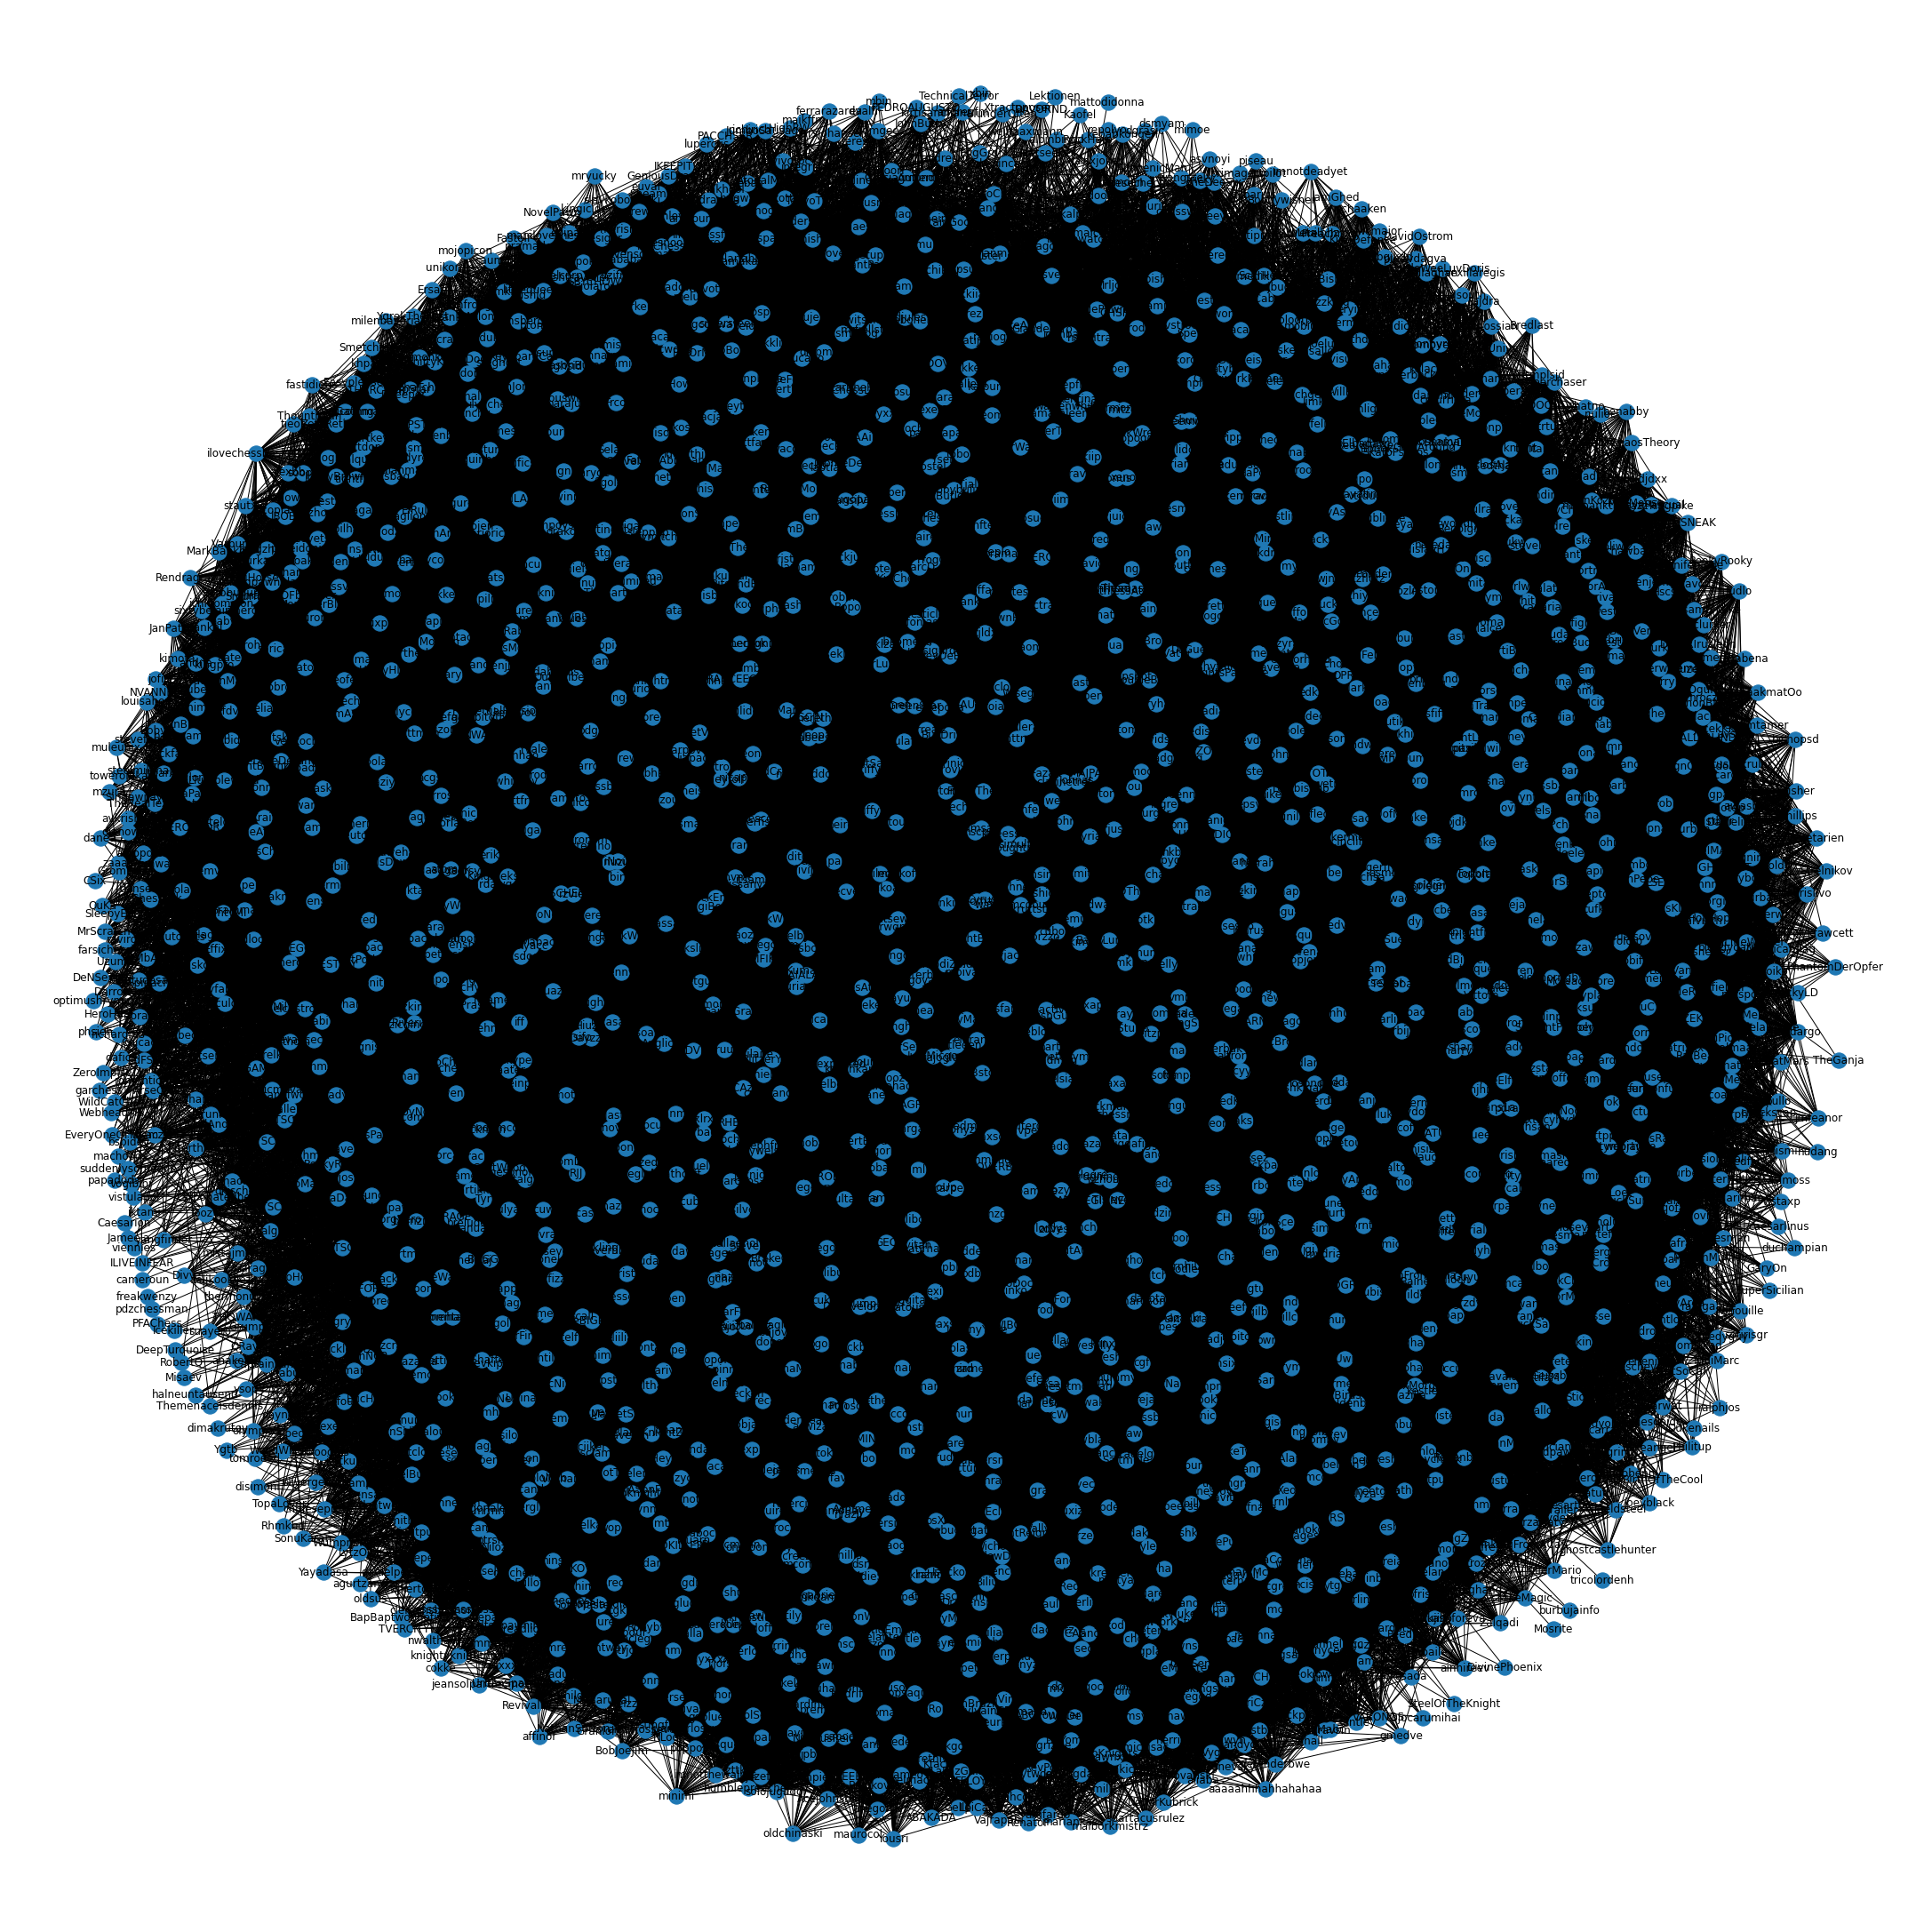

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
nx.draw_kamada_kawai(g, with_labels=True)

**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

In [8]:
# see more details in the course first lecture
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"<Insert Your Kaggle User Name>","key":"<Insert Your Kaggle API key>"}


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [9]:
# Creating a dataset directory
!mkdir ./datasets/ltor
!cd ./datasets/ltor

# download the dataset from Kaggle and unzip it
!kaggle datasets download paultimothymooney/lord-of-the-rings-data  -p ./datasets/ltor
!unzip ./datasets/ltor/*.zip  -d ./datasets/ltor
!ls ./datasets/ltor

mkdir: cannot create directory ‘./datasets/ltor’: File exists
  0% 0.00/88.0k [00:00<?, ?B/s]
100% 88.0k/88.0k [00:00<00:00, 34.3MB/s]
Archive:  ./datasets/ltor/lord-of-the-rings-data.zip
  inflating: ./datasets/ltor/lotr_characters.csv  
  inflating: ./datasets/ltor/lotr_scripts.csv  
lord-of-the-rings-data.zip  lotr_characters.csv  lotr_scripts.csv


In [10]:
import re 
import numpy as np
import pandas as pd
import networkx as nx

df = pd.read_csv("./datasets/ltor/lotr_characters.csv")
df = df.fillna('')
df

birth  ...                                 spouse
0                                        ...                                Belemir
1                               TA 2978  ...                                       
2                                        ...                                       
3                                TA 280  ...                           Unnamed wife
4                                        ...                                       
..                                  ...  ...                                    ...
906                      Mid ,First Age  ...                                 Brodda
907                                      ...                                       
908  YT during the ,Noontide of Valinor  ...  Loved ,Andreth but remained unmarried
909                             TA 2917  ...                           Unnamed wife
910                     Before ,TA 1944  ...                                       

[911 rows x 9 columns]

In [11]:
import re
def normailze_spouse(s):
    if s in {'','Unnamed wife', 'None' }:
        return None
    if "Loved" not in s:
        return s
    
    r = re.compile("Loved ,(\w+)")
    l = r.findall(s)
    if len(l) > 0:
        return l[0]
df['norm_spouse'] = df['spouse'].apply(lambda s: normailze_spouse(s))
    
links_df = df[['name', 'norm_spouse', 'race', 'gender']]
links_df = links_df.dropna()
links_df

name   norm_spouse   race  gender
0               Adanel       Belemir    Men  Female
7               Angrod      Eldalótë  Elves    Male
10         Ar-Pharazôn    Tar-Míriel    Men    Male
12         Ar-Gimilzôr     Inzilbêth    Men    Male
21   Tarannon Falastur     Berúthiel    Men    Male
..                 ...           ...    ...     ...
897            Ailinel     Orchaldor    Men  Female
898           Almarian  Tar-Meneldur    Men  Female
899             Algund    None known    Men    Male
906              Aerin        Brodda    Men  Female
908             Aegnor       Andreth  Elves    Male

[228 rows x 4 columns]

In [12]:
links_df2 = pd.merge(links_df, links_df, left_on="name", right_on="norm_spouse")
links_df2 = links_df2[["name_x","race_x", "gender_x", "name_y", "race_y", "gender_y"]]
links_df2

name_x race_x gender_x        name_y race_y gender_y
0               Adanel    Men   Female       Belemir    Men     Male
1               Angrod  Elves     Male      Eldalótë  Elves   Female
2          Ar-Pharazôn    Men     Male    Tar-Míriel    Men   Female
3          Ar-Gimilzôr    Men     Male     Inzilbêth    Men   Female
4    Tarannon Falastur    Men     Male     Berúthiel    Men   Female
..                 ...    ...      ...           ...    ...      ...
122             Amroth  Elves     Male      Nimrodel  Elves   Female
123             Amarië  Elves   Female        Finrod  Elves     Male
124            Ailinel    Men   Female     Orchaldor    Men     Male
125           Almarian    Men   Female  Tar-Meneldur    Men     Male
126             Aegnor  Elves     Male       Andreth    Men   Female

[127 rows x 6 columns]

In [13]:
g = nx.Graph()

for i, r in links_df2.iterrows():
    g.add_node(r['name_x'],race=r["race_x"], gender=r["gender_x"])
    g.add_node(r['name_y'],race=r["race_y"], gender=r["gender_y"])
    edges_list = [(r['name_x'], r['name_y']) for i, r in links_df2.iterrows()]

g.add_edges_from(edges_list)

In [14]:
nx.write_gml(g,"The_Lord_of_the_Rings.gml")

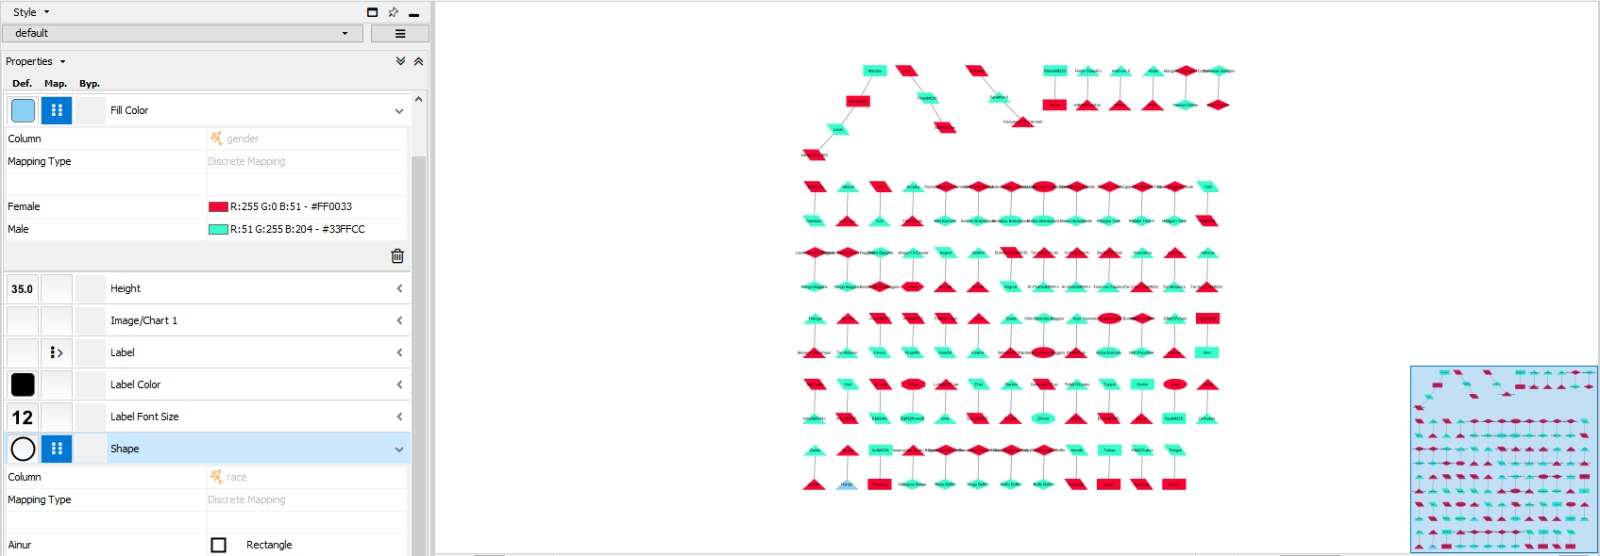

### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges